## Assignment 1
## Cooper M. Stansbury
## UMID: 63919844

to show possible methods: <br>
print(methods(class=class(carseats)))

### config

In [205]:
library(leaps)
library(modelr)
library(mgcv)
library(ggplot2)
library(DataExplorer)
library(dplyr)
library(GGally)

In [160]:
# show raw file via bash
print(system("head -n 5 data/Carseats_org.csv", intern=TRUE))

[1] "\"\",\"Sales\",\"CompPrice\",\"Income\",\"Advertising\",\"Population\",\"Price\",\"ShelveLoc\",\"Age\",\"Education\",\"Urban\",\"US\""
[2] "\"1\",9.5,138,73,11,276,120,\"Bad\",42,17,\"Yes\",\"Yes\""                                                                            
[3] "\"2\",11.22,111,48,16,260,83,\"Good\",65,10,\"Yes\",\"Yes\""                                                                          
[4] "\"3\",10.06,113,35,10,269,80,\"Medium\",59,12,\"Yes\",\"Yes\""                                                                        
[5] "\"4\",7.4,117,100,4,466,97,\"Medium\",55,14,\"Yes\",\"Yes\""                                                                          


### import data

In [161]:
carseats <- read.csv("data/Carseats_org.csv", header = T, stringsAsFactors = T)
names(carseats)

[1] "X"           "Sales"       "CompPrice"   "Income"      "Advertising"
 [6] "Population"  "Price"       "ShelveLoc"   "Age"         "Education"  
[11] "Urban"       "US"

In [162]:
drops <- c("X")
carseats <- carseats[ , !(names(carseats) %in% drops)]
head(carseats, 10)

str(carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1   9.50 138        73    11          276        120   Bad       42  17       
2  11.22 111        48    16          260         83   Good      65  10       
3  10.06 113        35    10          269         80   Medium    59  12       
4   7.40 117       100     4          466         97   Medium    55  14       
5   4.15 141        64     3          340        128   Bad       38  13       
6  10.81 124       113    13          501         72   Bad       78  16       
7   6.63 115       105     0           45        108   Medium    71  15       
8  11.85 136        81    15          425        120   Good      67  10       
9   6.54 132       110     0          108        124   Medium    76  10       
10  4.69 132       113     0          131        124   Medium    76  17       
   Urban US 
1  Yes   Yes
2  Yes   Yes
3  Yes   Yes
4  Yes   Yes
5  Yes   No 
6  No    Yes
7  Yes   No 
8  Yes   Yes
9  No    No 
10 No    Yes

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : int  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : int  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: int  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : int  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : int  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : int  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : int  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [163]:
# get vectors of continuous and categorical cols
nums <- dplyr::select_if(carseats, is.numeric)
cats <- dplyr::select_if(carseats, is.factor)

## Exploratory Data Analysis

In [164]:
# # get summary 
print(DataExplorer::introduce(data=carseats))
# plot_intro(carseats)

  rows columns discrete_columns continuous_columns all_missing_columns
1  400      11                3                  8                   0
  total_missing_values complete_rows total_observations memory_usage
1                    0           400               4400        24000


#### missing values?

In [165]:
# plot_missing(carseats)
# # check for nas
sapply(carseats, function(x) sum(is.na(x)))

Sales   CompPrice      Income Advertising  Population       Price 
          0           0           0           0           0           0 
  ShelveLoc         Age   Education       Urban          US 
          0           0           0           0           0

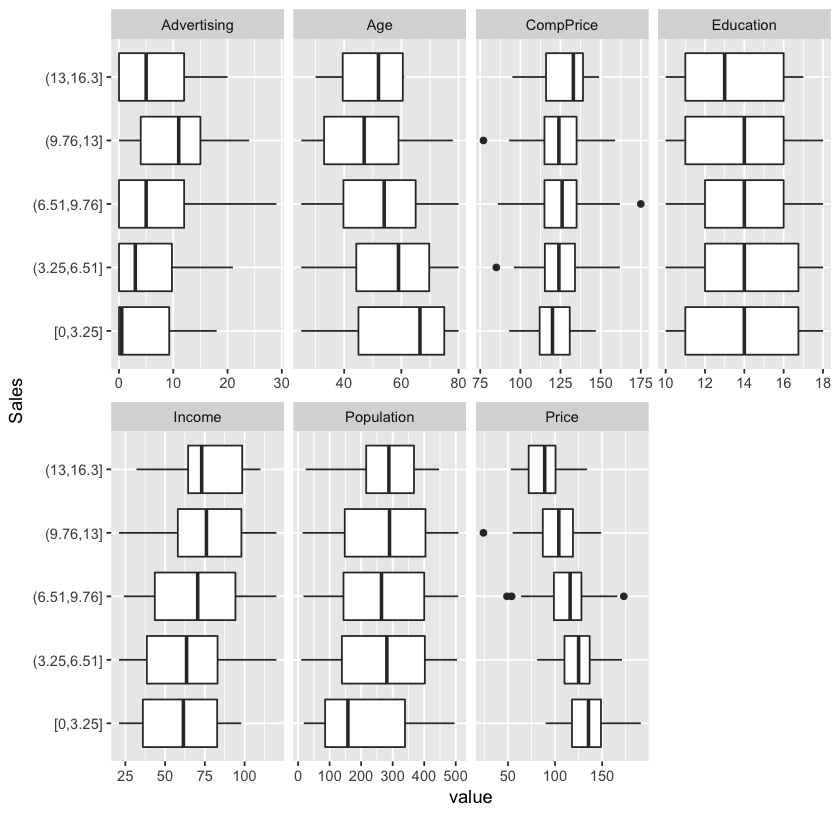

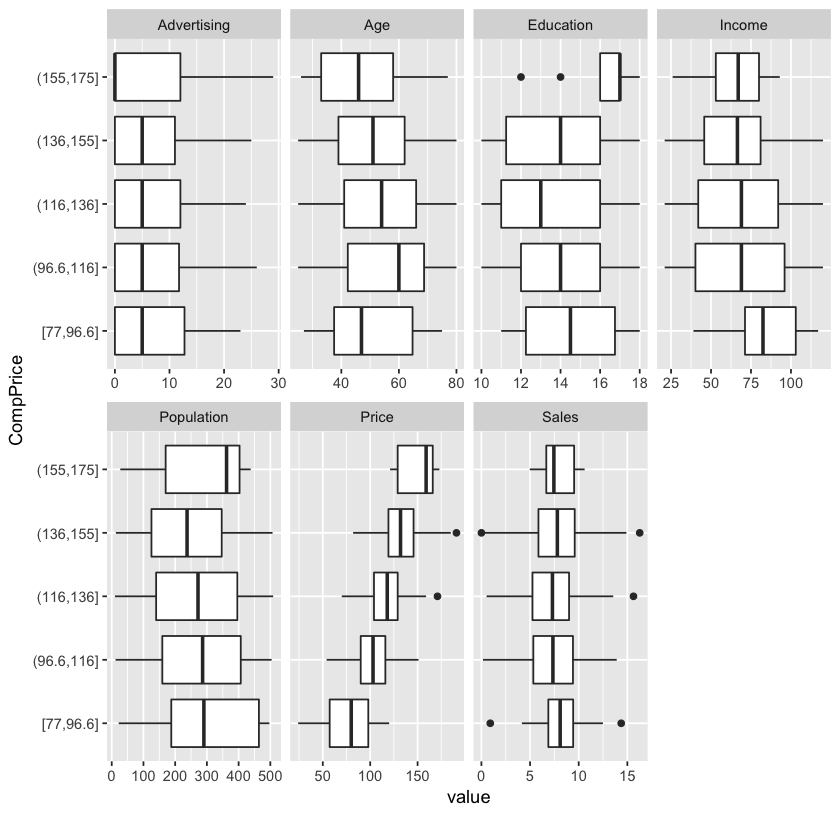

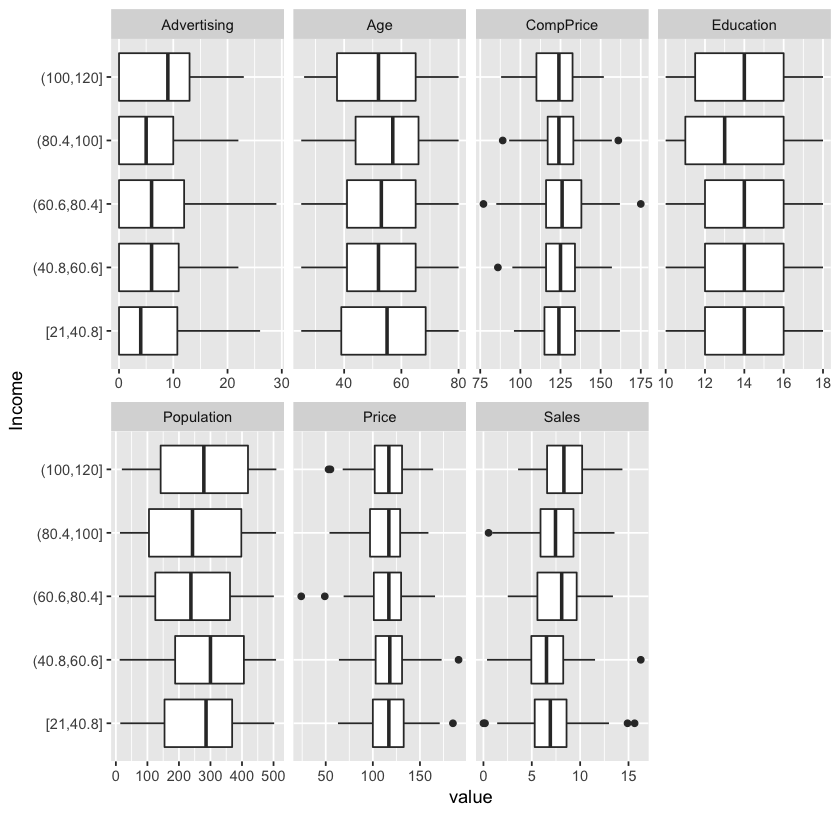

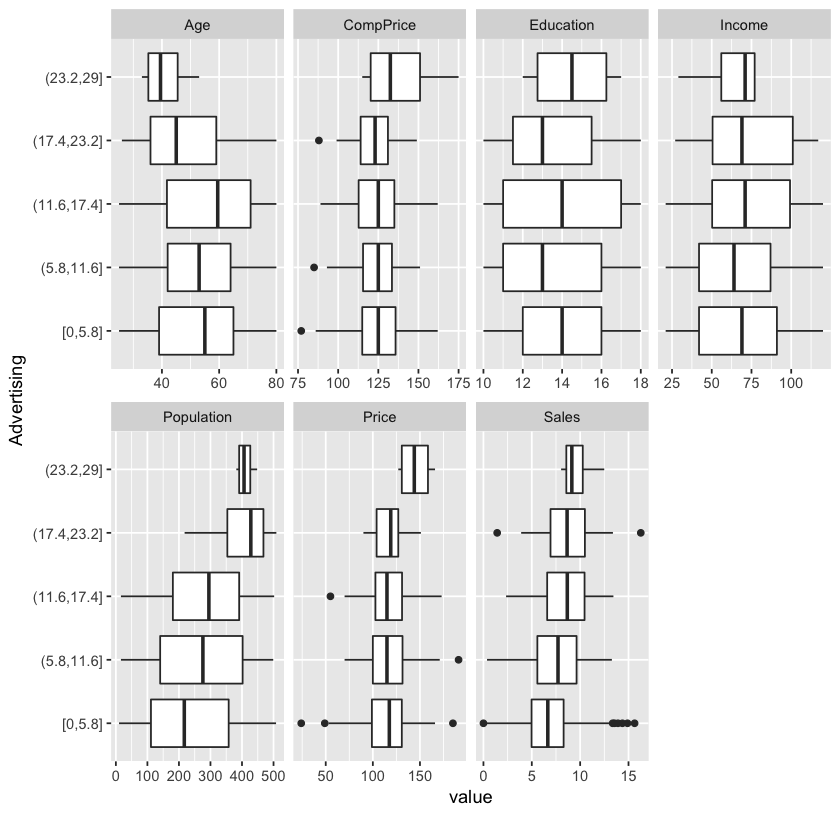

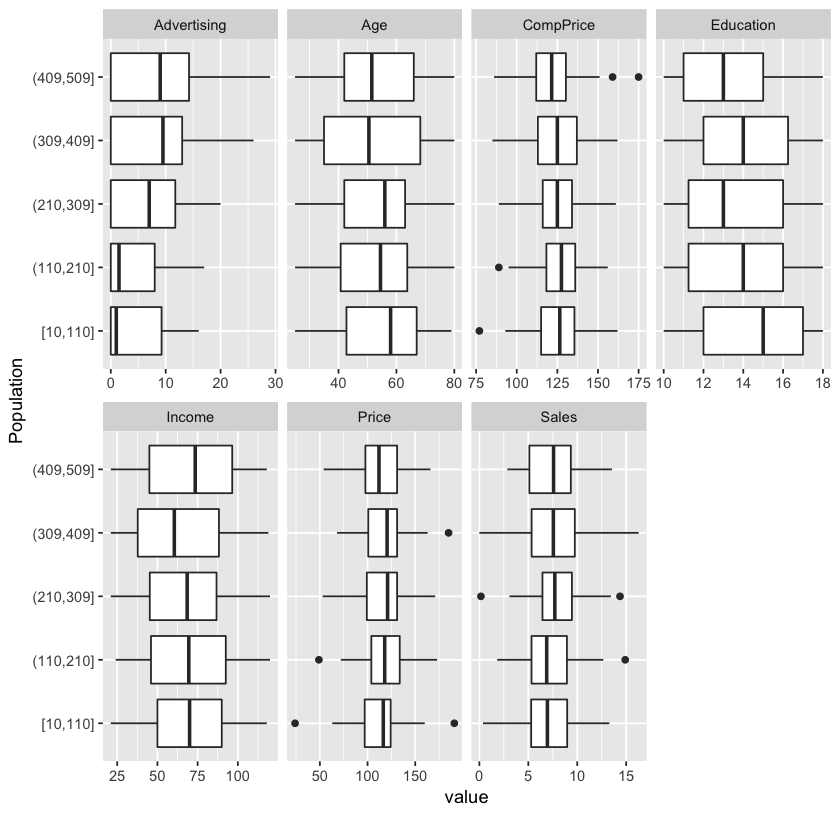

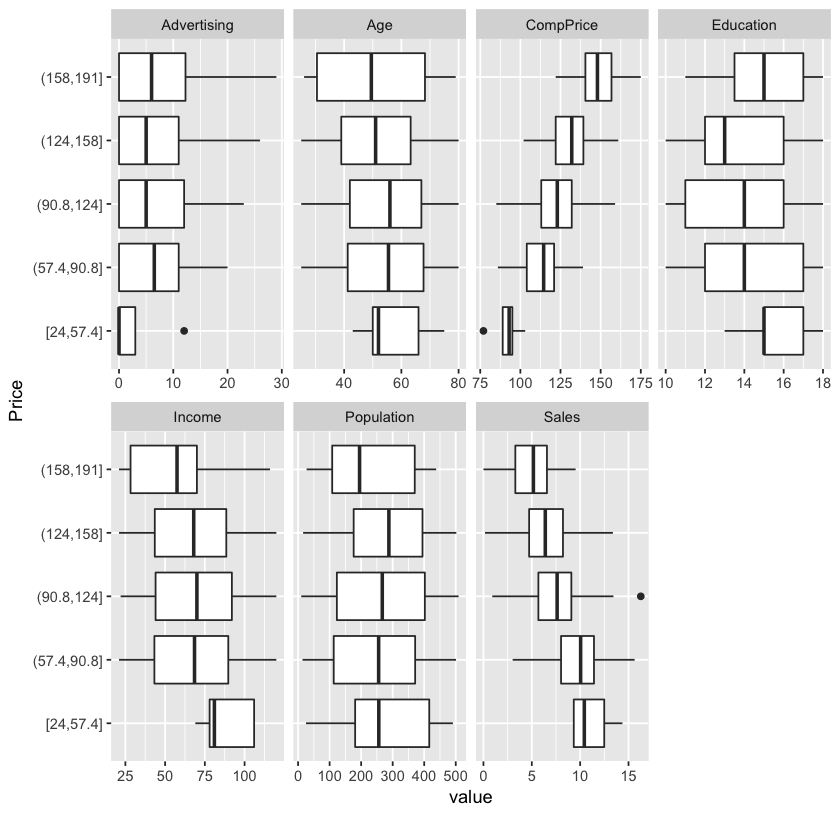

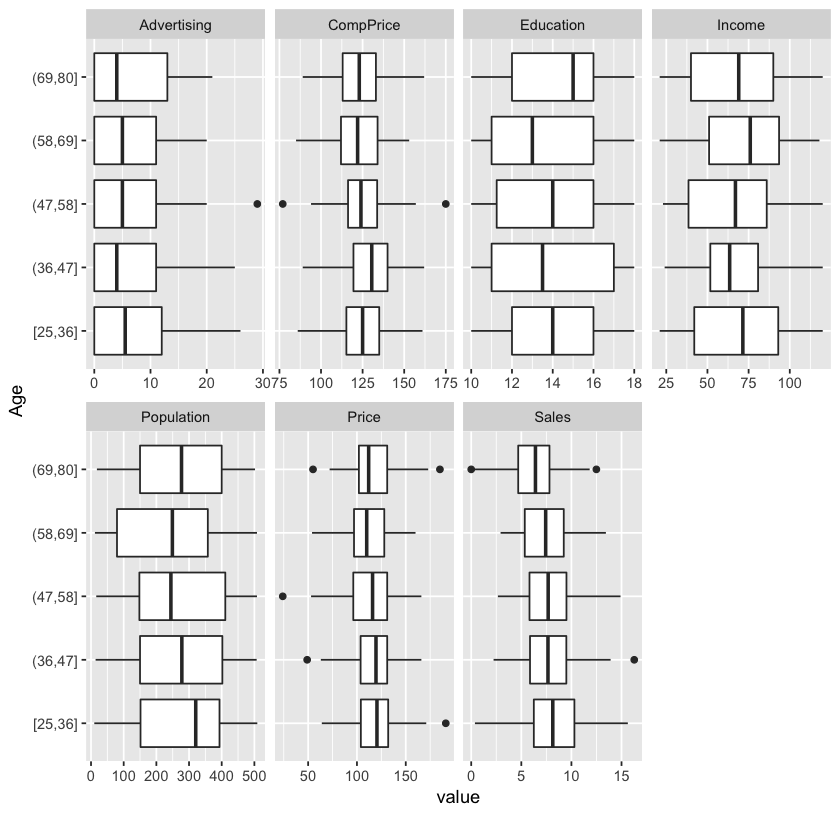

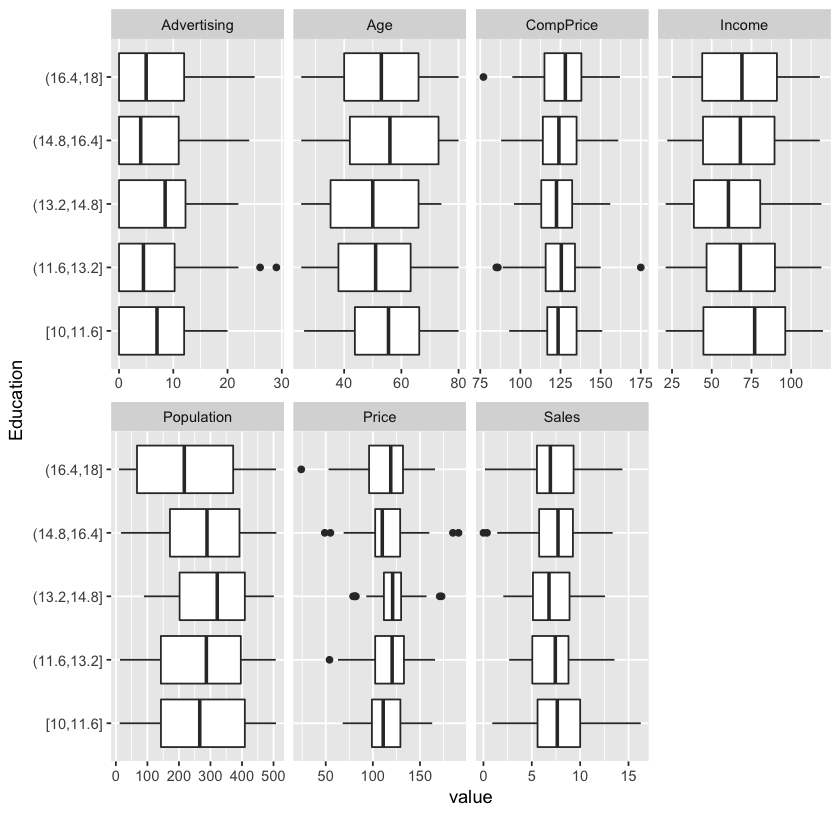

In [166]:
for(i in names(nums)){
    DataExplorer::plot_boxplot(nums, by = i)
    }

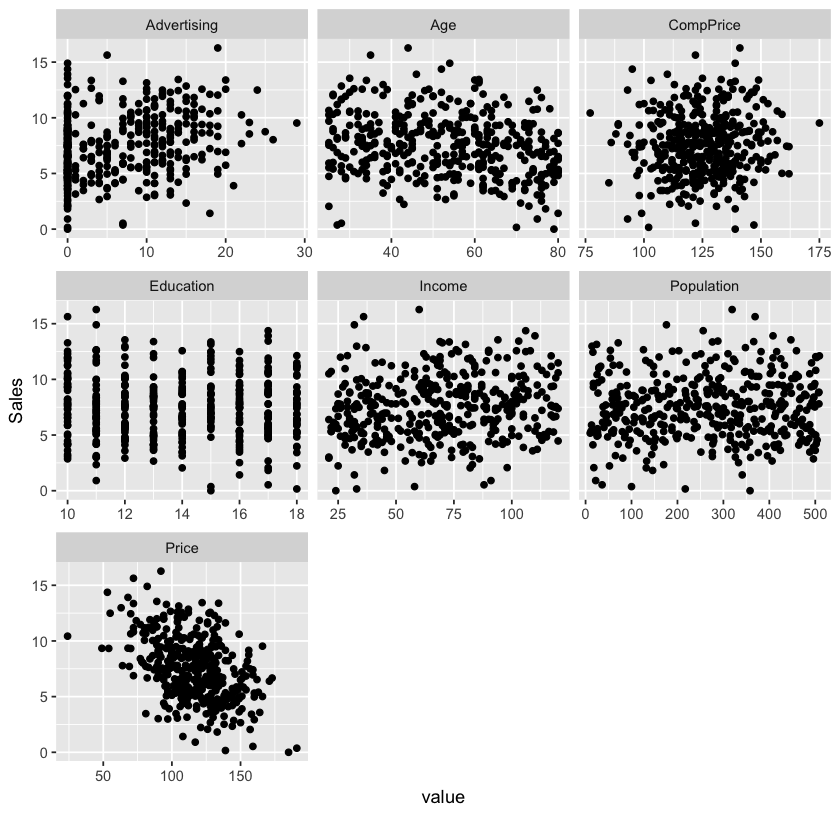

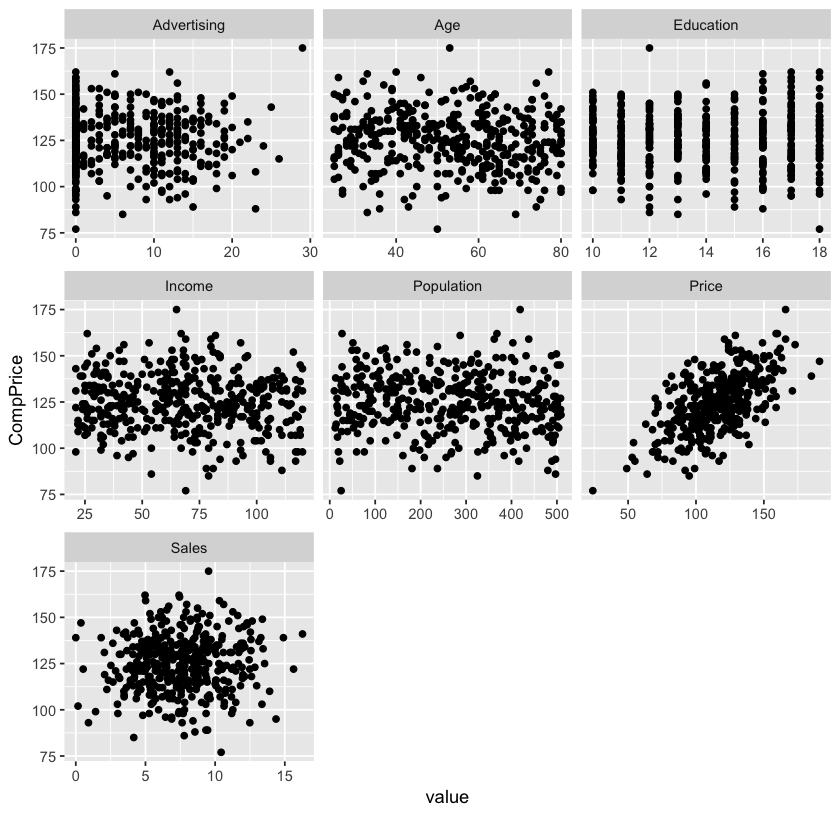

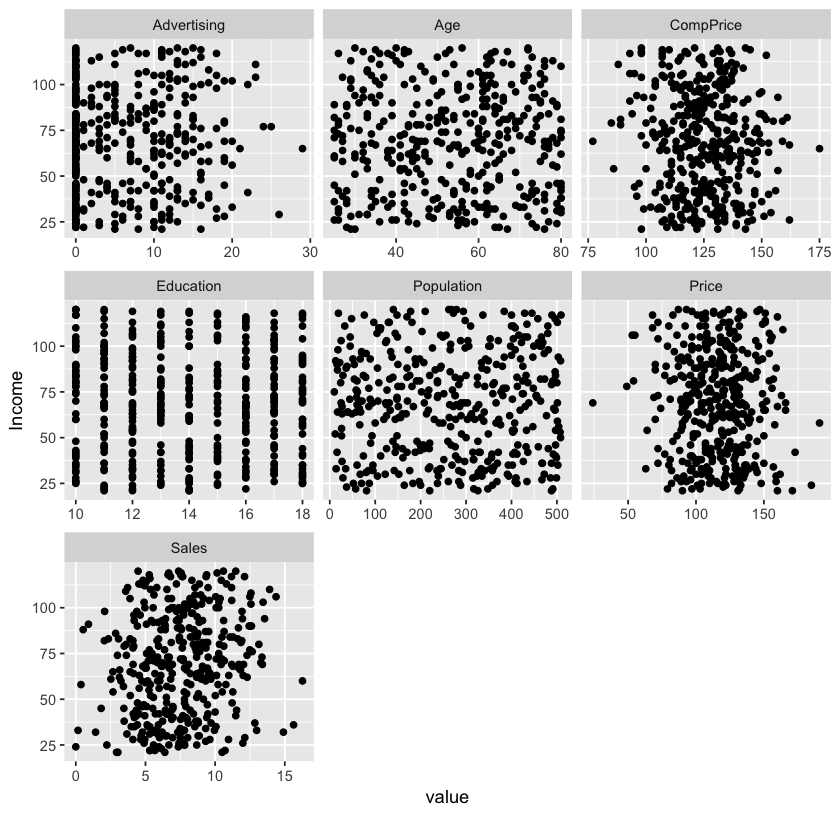

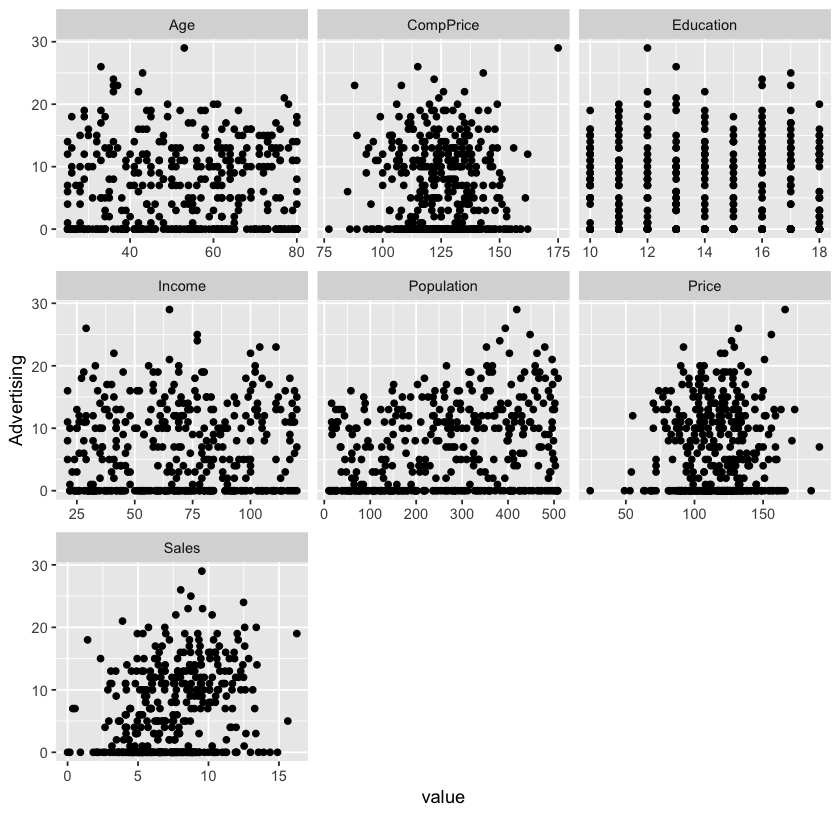

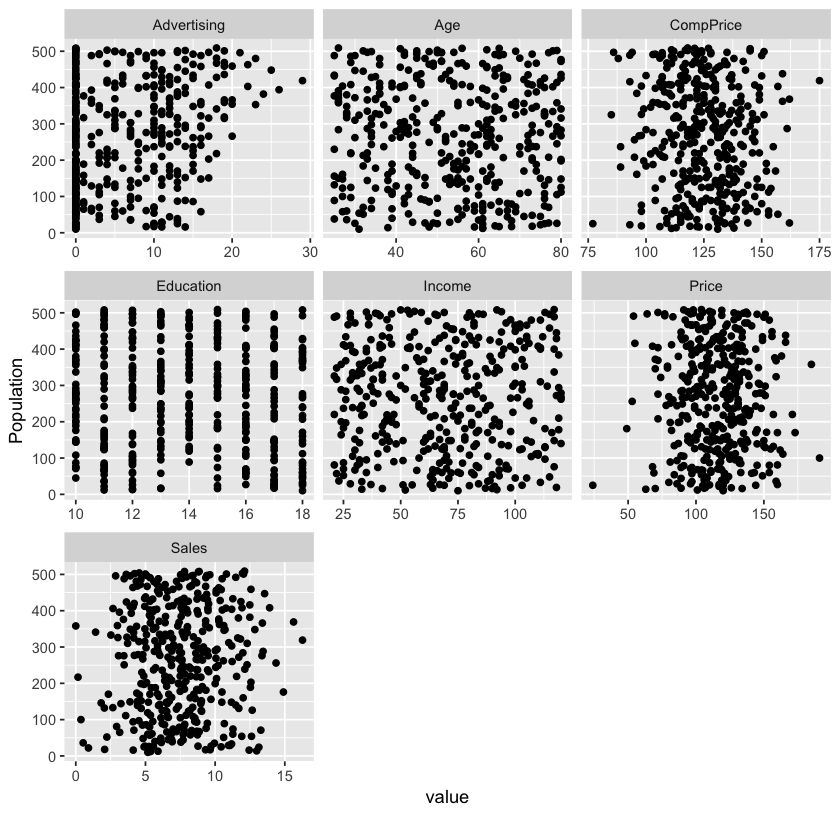

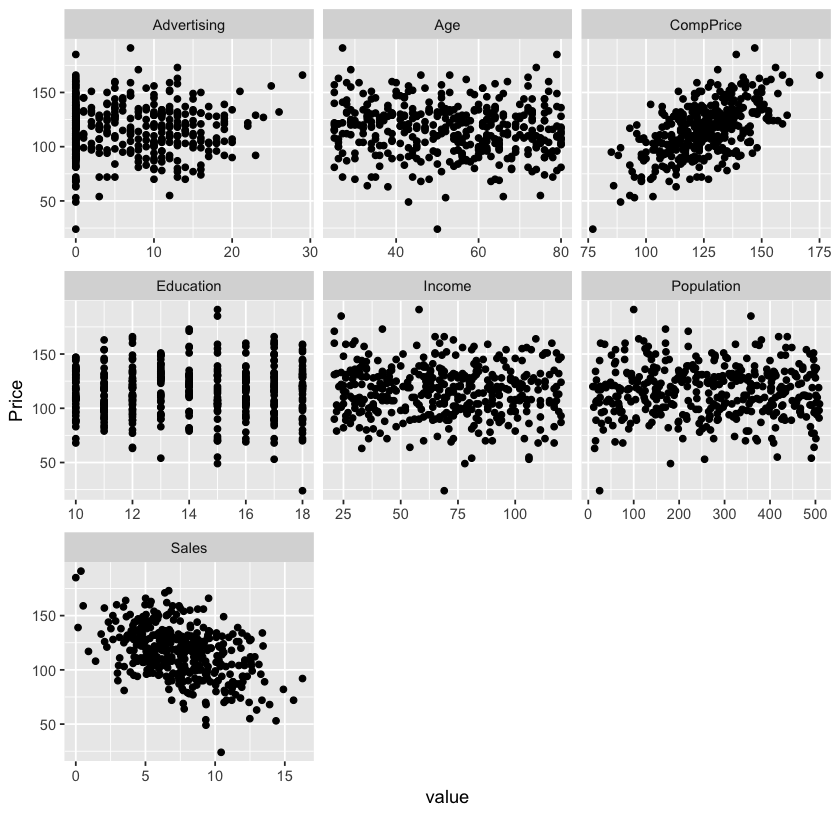

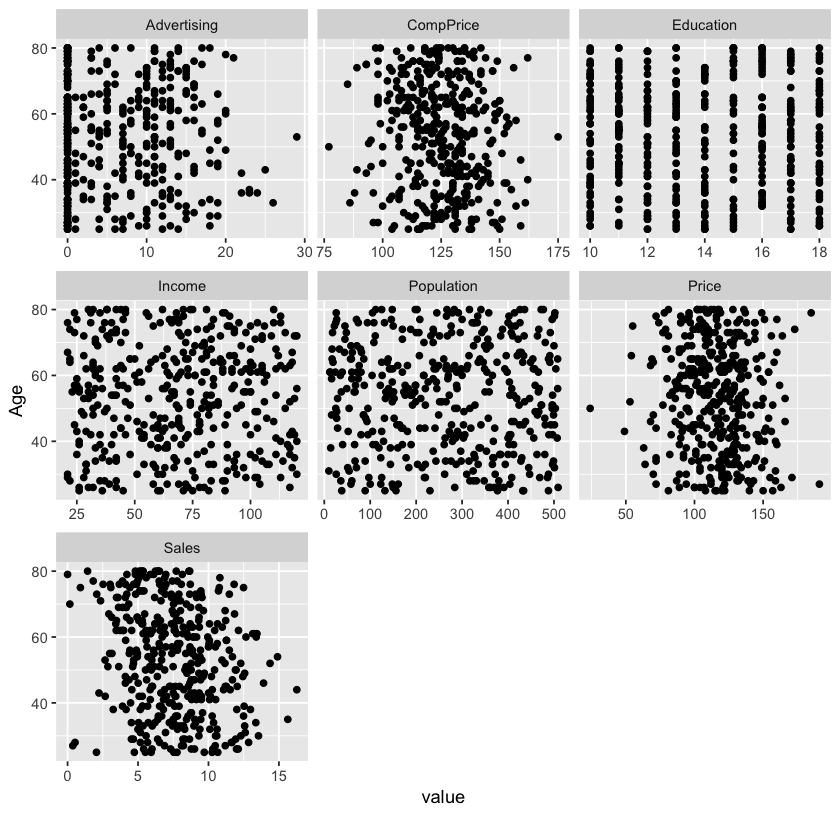

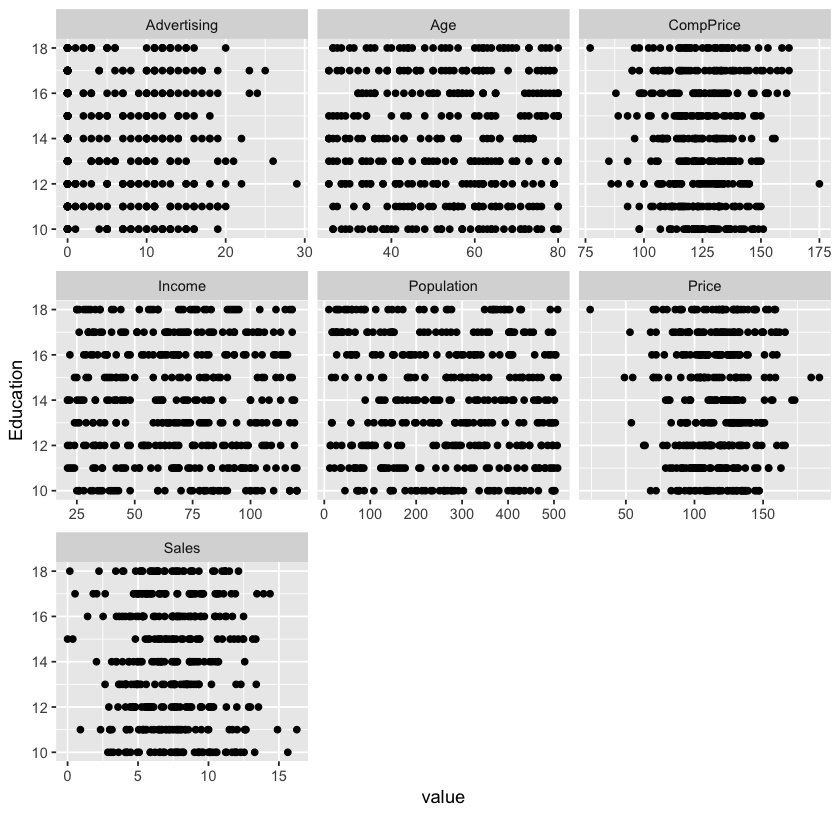

In [141]:
for(i in names(nums)){
    DataExplorer::plot_scatterplot(nums, by = i)
    }

Warning message:
“Duplicated aesthetics after name standardisation: pad”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


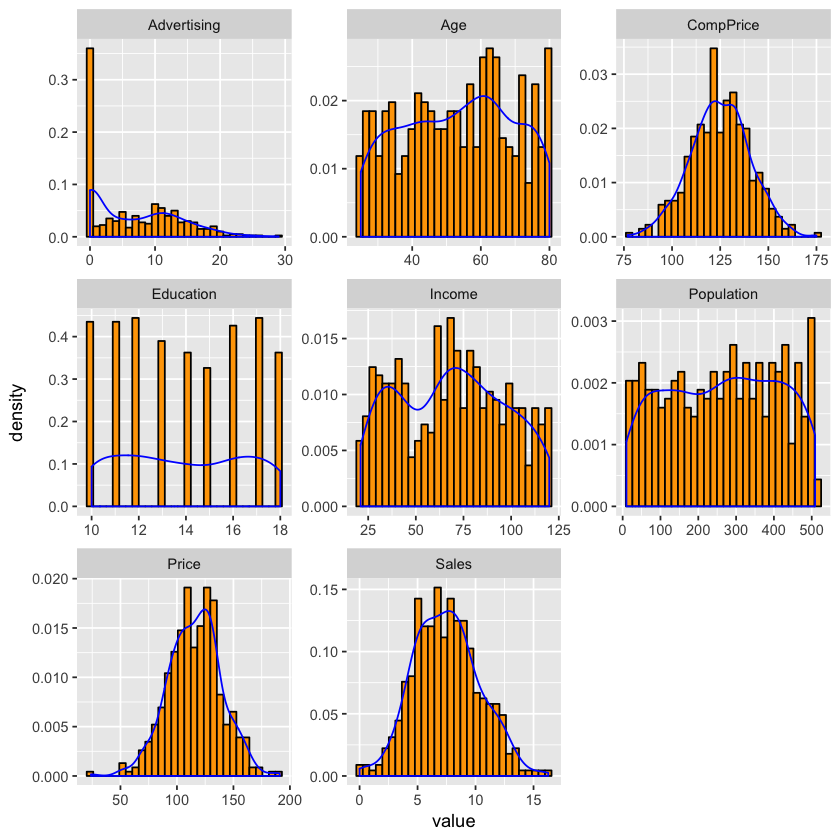

In [208]:
nums %>%
    gather() %>% 
    ggplot(aes(x=value,y=..density..)) +
        facet_wrap(~ key, scales = "free") +
        geom_histogram(fill=I("orange"), col=I("black"), pad=TRUE) +

        facet_wrap(~ key, scales = "free") +
        geom_density(color="blue")

# # two faster ways, but harder to customize
# DataExplorer::plot_density(carseats)
# DataExplorer::plot_histogram(carseats)

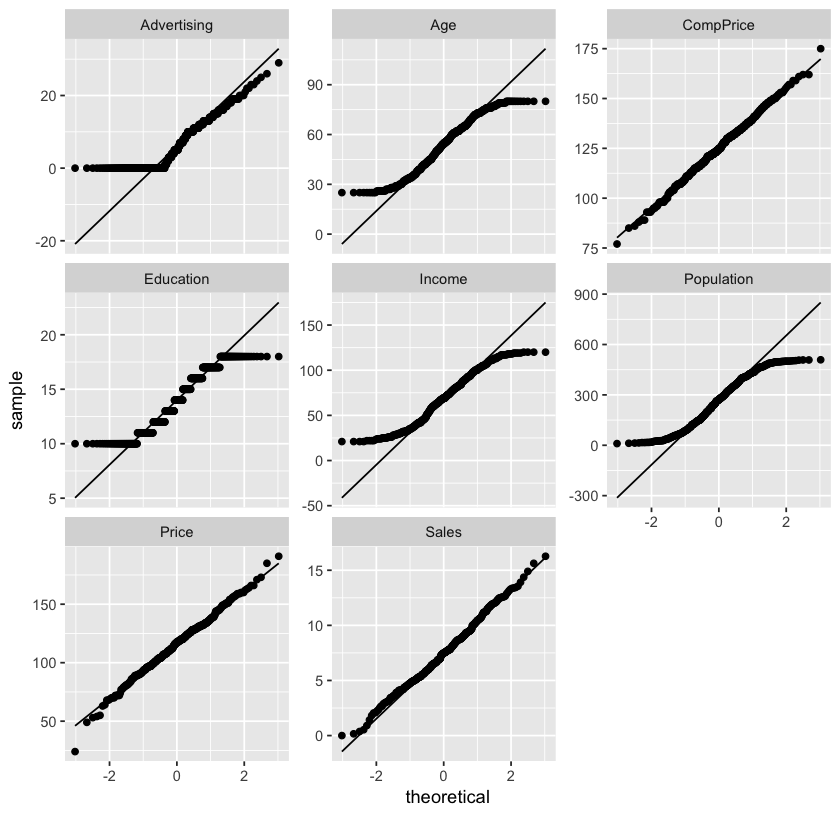

In [206]:
DataExplorer::plot_qq(carseats, sampled_rows = 1000L)

In [170]:
# for(i in names(nums)){
#     DataExplorer::plot_qq(nums, by = i, sampled_rows = 1000L)
#     }

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

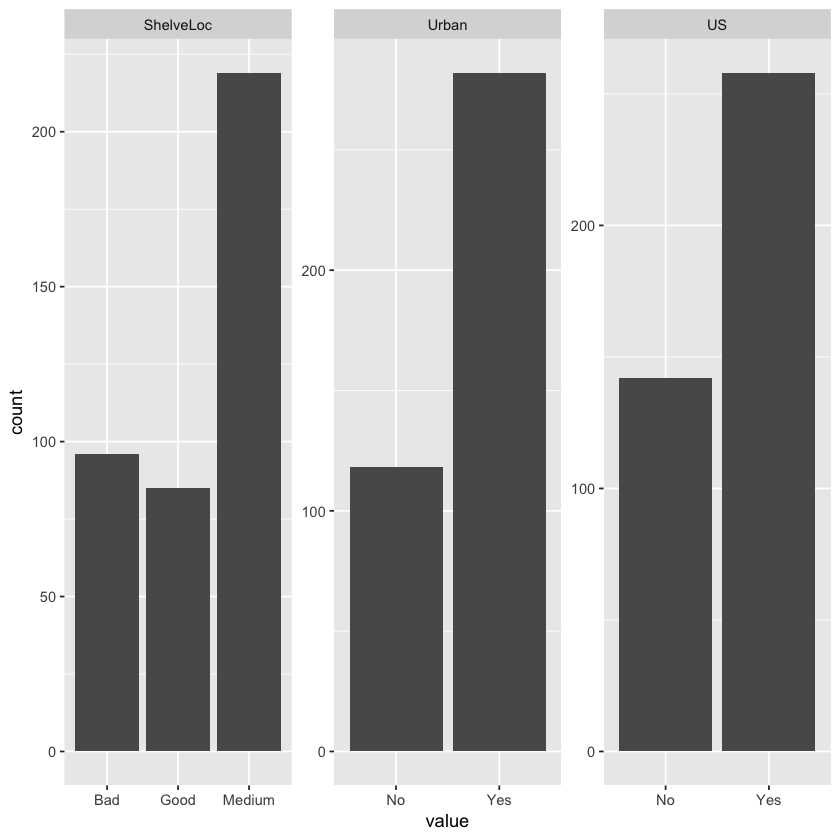

In [180]:
cats %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_bar()

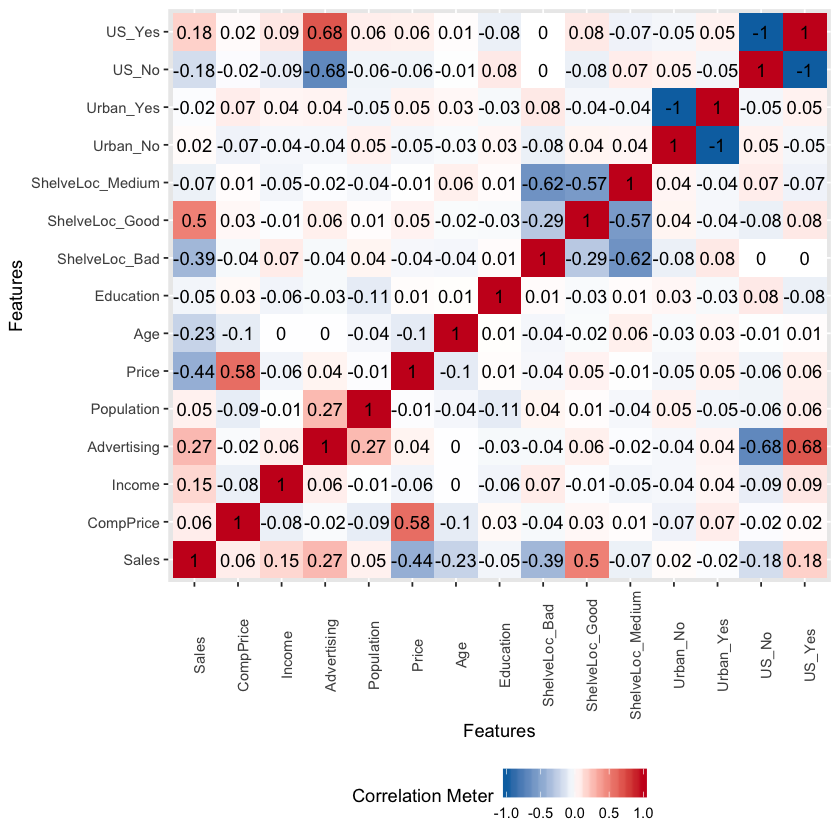

In [149]:
DataExplorer::plot_correlation(na.omit(carseats), maxcat = 5L)

## Build Report

In [150]:
# DataExplorer::create_report(carseats)